In [1]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [2]:
def scatter_plot_data(X,y, class_names, feature_names,marker='o',colors=[]):
    classes = np.unique(y)
    for i,class_ in enumerate(classes):
        X_class = X[np.where(y==class_)[0],:]
        if len(colors)==0:
            plt.scatter(X_class[:,0], X_class[:,1], marker=marker)
        else:
            plt.scatter(X_class[:,0], X_class[:,1], marker=marker,color = colors[i])
    plt.legend(class_names, loc=4)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])


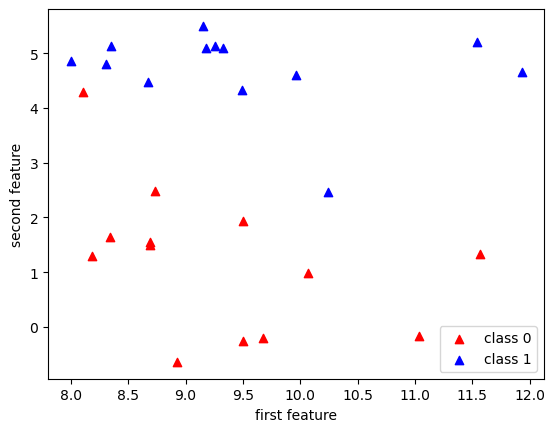

In [4]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
scatter_plot_data(X,y,['class 0','class 1'],['first feature', 'second feature'],'^',colors=['red', 'blue'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)
print(f"Train data shape = {X_train.shape}")
print(f"Test data shape = {X_test.shape}")

Train data shape = (20, 2)
Test data shape = (6, 2)


### Logistic Loss Function

The logistic loss function, also known as the binary cross-entropy loss, for a dataset is defined as:

$$
L = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

where:
- $m$ is the number of examples,
- $y_i$ is the actual label of the \(i\)th example,
- $\hat{y}_i$ is the predicted probability for the \(i\)th example.

### Derivative of the Logistic Loss Function

The derivative of the logistic loss function with respect to the input \(z\) (the weighted sum before applying the sigmoid function) is given by:

$$
\frac{\partial L}{\partial z} = \hat{y} - y
$$

where:
- $\hat{y}$  - is the predicted probability
- $(y)$ - is the actual label.

### Update Equations for Weights and Bias

Given the derivative, the update equations for the model's weights and bias can be formulated as:

$$
w_{\text{new}} = w_{\text{old}} - \alpha \cdot (\hat{y} - y) \cdot x
$$

$$
b_{\text{new}} = b_{\text{old}} - \alpha \cdot (\hat{y} - y)
$$

where:
- \(\alpha\) is the learning rate,
- \(x\) is the input feature vector.


In [146]:
class LogisticRegression:
    def __init__(self, alpha = 0.1):
        self.alpha = alpha
        self.w = None
        self.b = None
        np.random.seed(27) #for reproducibility
    def sigmoid(self, x):
        sigmoid = 1/(1+np.exp(-x))
        return sigmoid
    def prob(self, X):
        z = np.dot(X,self.w)+self.b
        return self.sigmoid(z)
    def loss_func(self, p, y, m):
#         print(f"y shape = {y.shape}, p shape = {p.shape}")
        L = np.dot(y,np.log(p))+np.dot((1-y),np.log(1-p))
        L2 = np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
#         print(f"Loss  = {L}, L2 = {L2}")
        L = -L/m
        return L
    def fit(self, X_train, y_train, max_iter = 1000):
        m, n = X_train.shape
        self.w = np.random.random(n)
        self.b = np.random.random(1)
        
        prev_loss = math.inf
        loss = 0
        i = 0
        while np.abs(prev_loss-loss)>=1e-2 and i<max_iter:
            y_hat = self.prob(X_train)
#             print(f"y_hat = {y_hat}, \n w = {self.w}, \n b = {self.b}")
            loss = self.loss_func(y_hat, y_train, m)
            #derivative
            dl_dw = np.dot(y_hat-y_train,X_train)/m
            dl_db = np.sum(y_hat-y_train)/m
            self.w = self.w-self.alpha*dl_dw
            self.b = self.b-self.alpha*dl_db
            if i%100==0:
                print(f"loss = {loss} for iter = {i}")
            i+=1
    def predict_proba(self, X):
        y_pred = self.prob(X)
        return y_pred
    def predict(self, X, thresh=0.5):
        y_pred = self.predict_proba(X)
        y_pred[y_pred>=thresh]=1
        y_pred[y_pred<thresh]=0
        return np.array(list(map(int,y_pred)))
        

In [147]:
logistic_reg = LogisticRegression()
print(f"training logistic regression")
logistic_reg.fit(X_train,y_train)
y_pred = logistic_reg.predict(X_test)
print(f"predictions = {y_pred}")
print(f"gt = {y_test}")

training logistic regression
loss = 2.165192457671733 for iter = 0
loss = 0.1532437035399478 for iter = 100
loss = 0.14051655508764782 for iter = 200
loss = 0.1359185132420454 for iter = 300
loss = 0.1335412505131135 for iter = 400
loss = 0.13205075785703566 for iter = 500
loss = 0.13098977136516027 for iter = 600
loss = 0.1301630568199501 for iter = 700
loss = 0.1294749101664658 for iter = 800
loss = 0.12887373256828377 for iter = 900
predictions = [0 1 0 0 0 1]
gt = [0 0 0 0 0 1]


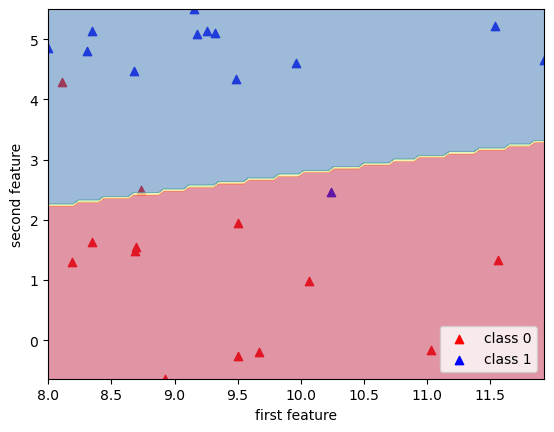

In [148]:
scatter_plot_data(X,y,['class 0','class 1'],['first feature', 'second feature'],'^',colors=['red', 'blue'])
x_min, x_max = X[:,0].min(), X[:,0].max()
y_min, y_max = X[:,1].min(), X[:,1].max()
xx,yy = np.meshgrid(np.linspace(x_min,x_max,100), np.linspace(y_min,y_max,100))
Z = logistic_reg.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z, cmap=plt.cm.Spectral, alpha=0.5)



### Softmax Function

The softmax function is utilized in multi-class classification problems to transform raw logits (scores) from the model into probabilities. For a given vector of raw class scores $\mathbf{z} = [z_1, z_2, \ldots, z_K]$ from the model for one data point, where $K$ is the number of classes, the softmax function for class $k$ is defined as:

$$
\text{softmax}(z_k) = \frac{e^{z_k}}{\sum_{j=1}^{K} e^{z_j}}
$$

This operation results in a vector $\mathbf{p}$ where each component $p_k$ represents the probability that the data point belongs to class $k$, given the logits $\mathbf{z}$. The probabilities $p_k$ for all classes $k$ sum up to 1.

### Cross-Entropy Loss

In conjunction with the softmax function, cross-entropy loss (or log loss) measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. For a single data point and true class $y_k$, where $y_k$ is 1 for the correct class and 0 for others, the cross-entropy loss for that data point is:

$$
L = -\sum_{k=1}^{K} y_k \log(p_k)
$$

For $N$ data points, the average cross-entropy loss over the dataset is:

$$
L = -\frac{1}{N}\sum_{i=1}^{N}\sum_{k=1}^{K} y_{ik} \log(p_{ik})
$$

where $y_{ik}$ is the indicator for whether class $k$ is the correct classification for observation $i$, and $p_{ik}$ is the probability that observation $i$ is classified as class $k$.

### Derivative of Cross-Entropy Loss with Respect to Logits

The derivative of the cross-entropy loss with respect to the raw logits $\mathbf{z}$ (before applying softmax) is essential for updating the model parameters during training via gradient descent. Given the softmax probabilities $\mathbf{p}$ and the one-hot encoded true labels $\mathbf{y}$, the gradient is:

$$
\frac{\partial L}{\partial z_k} = p_k - y_k
$$

This represents the difference between the predicted probability and the actual label for each class $k$, which intuitively guides how the model's logits $\mathbf{z}$ should be adjusted to reduce the loss.
